## Clean data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RawData.csv")
df

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_13520\1498686140.py:1: DtypeWarning: Columns (5,31,32,34,35,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,Land Type (Text),Width (Text),Ad ID,State,Floors,Rooms,Toilets,Furnishing Sell,District,District Name
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 4 m,0,0,0.0,0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 10 m,0,0,0.0,0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0,0.0,0.0,quận cẩm lệ,Quận Cẩm Lệ
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22903,0,123783254,24/03/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,166111810,accepted,NaN,2,NaN,NaN,quận sơn trà,Quận Sơn Trà
22904,0,123732634,21/03/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,166052754,accepted,1.0,2,2.0,NaN,quận cẩm lệ,Quận Cẩm Lệ
22905,0,123814515,25/03/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,166147754,accepted,1.0,2,2.0,2.0,quận cẩm lệ,Quận Cẩm Lệ
22906,0,122654608,06/02/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,164800816,accepted,2.0,3,2.0,NaN,quận hải châu,Quận Hải Châu


In [3]:
df = pd.read_csv("RawData.csv")

df = df[
    [
        "Category Name", "Posted Time", "Street Name","District Name", "Ward Name", "Price per m²"
    ]
]

df

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_13520\3869627039.py:1: DtypeWarning: Columns (5,31,32,34,35,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


,Category Name,Posted Time,Street Name,District Name,Ward Name,Price per m²
0,Đất,31/01/2025,Thanh vinh 15,Quận Liên Chiểu,Phường Hòa Minh,1.500000
1,Đất,07/02/2025,Đường Hoàng Văn Thái,Quận Liên Chiểu,Phường Hòa Khánh Nam,1.617647
2,Đất,31/01/2025,Đường Đà Sơn,Quận Liên Chiểu,Phường Hòa Khánh Nam,1.666667
3,Đất,31/01/2025,Vũ lăng,Quận Cẩm Lệ,Phường Hòa Phát,2.500000
4,Đất,01/02/2025,Âu cơ,Quận Liên Chiểu,Phường Hòa Khánh Bắc,2.500000
...,...,...,...,...,...,...
22903,Nhà ở,24/03/2025,Đường Đinh Thị Hòa,Quận Sơn Trà,Phường An Hải Bắc,79.439440
22904,Nhà ở,21/03/2025,Đường Đoàn Nguyễn Tuấn,Quận Cẩm Lệ,Phường Hòa Xuân,30.423729
22905,Nhà ở,25/03/2025,Đường Đội Cấn,Quận Cẩm Lệ,Phường Hòa Xuân,46.000000
22906,Nhà ở,06/02/2025,Đường Ca Văn Thỉnh,Quận Hải Châu,Phường Hòa Cường Nam,77.333336


In [4]:
df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)

### Handling missing data

#### Lost data statistics

In [5]:
print(df.isnull().sum())

Category Name      0
Posted Time        0
Street Name        0
District Name    487
Ward Name          2
Price per m2       0
dtype: int64


In [6]:
df.dropna(subset=["Ward Name"], inplace=True)
df.dropna(subset=["District Name"], inplace=True)

In [7]:
print(df.isnull().sum())

Category Name    0
Posted Time      0
Street Name      0
District Name    0
Ward Name        0
Price per m2     0
dtype: int64


In [8]:
df_land = df[df["Category Name"] == "Đất"]
df_land = df_land.drop(columns=["Category Name"]) 
df_land

,Posted Time,Street Name,District Name,Ward Name,Price per m2
0,31/01/2025,Thanh vinh 15,Quận Liên Chiểu,Phường Hòa Minh,1.500000
1,07/02/2025,Đường Hoàng Văn Thái,Quận Liên Chiểu,Phường Hòa Khánh Nam,1.617647
2,31/01/2025,Đường Đà Sơn,Quận Liên Chiểu,Phường Hòa Khánh Nam,1.666667
3,31/01/2025,Vũ lăng,Quận Cẩm Lệ,Phường Hòa Phát,2.500000
4,01/02/2025,Âu cơ,Quận Liên Chiểu,Phường Hòa Khánh Bắc,2.500000
...,...,...,...,...,...
22677,08/04/2025,Đường Võ Nguyên Giáp,Quận Ngũ Hành Sơn,Phường Khuê Mỹ,212.500000
22678,22/03/2025,Đường Bùi Cẩm Hồ,Huyện Hòa Vang,Xã Hòa Châu,27.500000
22679,29/03/2025,lỗ giáng,Quận Cẩm Lệ,Phường Hòa Xuân,33.823530
22680,04/04/2025,Đường Thành Vinh 2,Quận Sơn Trà,Phường Thọ Quang,53.000000


In [9]:
df_land_avg = df_land.groupby(["Posted Time", "Street Name", "Ward Name", "District Name"], as_index=False)["Price per m2"].mean()
df_land_avg

,Posted Time,Street Name,Ward Name,District Name,Price per m2
0,01/01/2025,Bầu Trảng,Phường Thanh Khê Tây,Quận Thanh Khê,32.80702
1,01/01/2025,Diệp Minh Châu,Phường Hòa Xuân,Quận Cẩm Lệ,38.90000
2,01/01/2025,Dự án Golden Hill,Phường Hòa Hiệp Nam,Quận Liên Chiểu,26.40000
3,01/01/2025,Hòa Hải,Phường Hoà Hải,Quận Ngũ Hành Sơn,38.88889
4,01/01/2025,Hòa Quý,Phường Hoà Quý,Quận Ngũ Hành Sơn,56.50000
...,...,...,...,...,...
10834,31/12/2024,Đường Tôn Đản,Phường Hòa Thọ Tây,Quận Cẩm Lệ,26.50000
10835,31/12/2024,Đường Tú Quỳ,Phường Hòa Minh,Quận Liên Chiểu,31.70000
10836,31/12/2024,Đường số 5,Phường Hòa Hiệp Nam,Quận Liên Chiểu,27.20000
10837,31/12/2024,Đường Đà Sơn,Phường Hòa Khánh Nam,Quận Liên Chiểu,26.58763


### Exceptional data processing (outliers)

In [10]:
df = df[df["Price per m2"] >= 1].copy()
print("Đã loại bỏ các dòng có đơn giá dưới 1 triệu đồng/m².")

Đã loại bỏ các dòng có đơn giá dưới 1 triệu đồng/m².


In [11]:
df_noOutliers = df.copy()

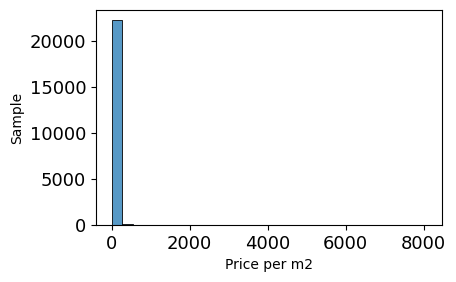

In [12]:
numerical_columns = ["Price per m2"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

In [13]:
cols = ["Price per m2"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 3 * iqr  
    lower_bound = q1 - 3 * iqr  

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

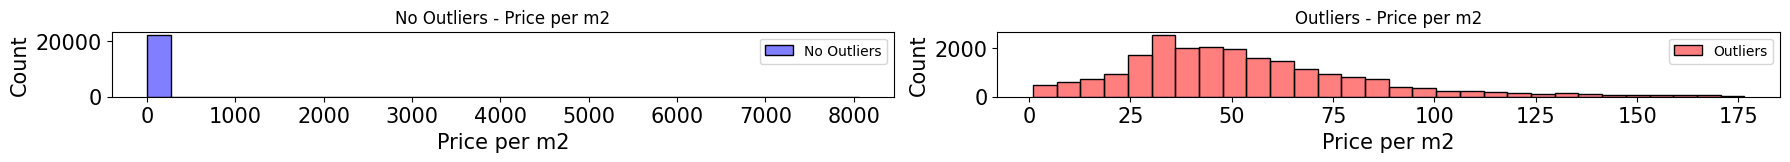

In [14]:
cols = ["Price per m2"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(9, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(9, 2, 2*i)
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [15]:
df_land_avg.to_csv('CleanData.csv', index=False)

## Conclusion